In [33]:
import pandas as pd
from pandas import DataFrame 
import matplotlib.pyplot as plot
import numpy as np
from sklearn import preprocessing
import scipy.stats as stats
import pylab 

In [2]:
df=pd.read_csv('C:/Users/zxfly/Desktop/UIUC/first semester/machine learning 1/module3/HY_Universe_corporate bond.csv')

In [3]:
df.head()

,CUSIP,Ticker,Issue Date,Maturity,1st Call Date,Moodys,S_and_P,Fitch,Bloomberg Composite Rating,Coupon,...,percent_intra_dealer,percent_uncapped,bond_type,Client_Trade_Percentage,weekly_mean_volume,weekly_median_volume,weekly_max_volume,weekly_min_volume,weekly_mean_ntrades,weekly_median_ntrades
0,000324AA1,FLECIN,7/1/2014,7/1/2019,10/23/2017,Nan,Nan,Nan,Nan,12.00,...,0.006645,0.292359,5,0.521595,3105926.765,2000000.0,18980000.0,60000.0,3.541176,1
1,00080QAB1,RBS,3/15/2004,6/4/2018,Nan,Ba1,BB+,BBB,BB+,4.65,...,0.425018,0.974071,2,0.337071,1721696.774,1160000.0,11197000.0,5000.0,18.412903,3
2,00081TAD0,ACCO,5/14/2010,3/15/2015,Nan,WR,NR,BB+,NR,10.63,...,0.115207,0.594470,5,0.467742,4200313.433,3520000.0,14000000.0,24000.0,6.477612,1
3,00081TAH1,ACCO,6/17/2013,4/30/2020,Nan,WR,NR,WD,NR,6.75,...,0.426332,0.892462,3,0.212864,6321559.783,5487500.0,18459000.0,30000.0,27.038043,1
4,00081TAJ7,ACCO,12/22/2016,12/15/2024,12/15/2019,B1,BB-,BB,BB-,5.25,...,0.157216,0.690722,5,0.500000,5936714.286,3305500.0,72760000.0,90000.0,9.238095,1


In [4]:
#show all the columns that have Nan
for i in df.columns:
    if 'Nan'in df[i].tolist():
        print(i)

1st Call Date
Moodys
S_and_P
Fitch
Bloomberg Composite Rating
Months in JNK
Months in HYG
Months in Both


(2721, 37)
(2720, 37)


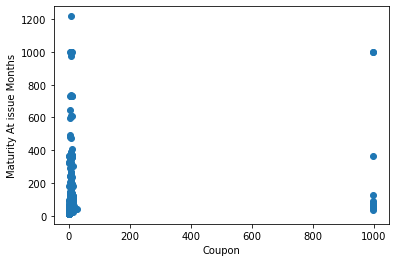

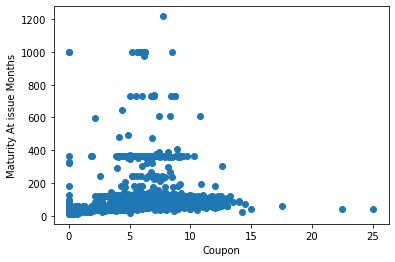

In [22]:
#calculate correlations between real-valued attributes --scatter plot
df1=df.dropna(inplace=False)
df1=df1.values[1:2722,:]
print(df.shape)
print(df1.shape)
#help(plot.scatter)
dataRow2 = df1[:,9] 
dataRow3 = df1[:,13]
plot.scatter(dataRow2, dataRow3)
plot.xlabel("Coupon") 
plot.ylabel(("Maturity At issue Months")) 
#_=plot.scatter(df['Coupon'],df['Maturity At Issue months'])
plot.show()
#delete coupon>500
df3=df.values[0:2721,[9,13]]
df2=df3
for i in range(0,2721):
    if df3[i,0]<500:
        df2[i,0]=df3[i,0]
    else:
        df2[i,0]=0
dataRow2 = df2[:,0] 
dataRow3 = df2[:,1]
plot.scatter(dataRow2, dataRow3)
plot.xlabel("Coupon") 
plot.ylabel(("Maturity At issue Months")) 
plot.show()

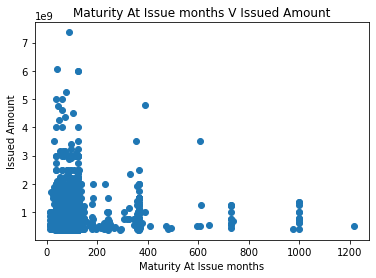

In [26]:
#Scatter plot2
plot.xlabel('Maturity At Issue months')
plot.ylabel('Issued Amount')
plot.title('Maturity At Issue months V Issued Amount')
_=plot.scatter(df['Maturity At Issue months'],df['Issued Amount'])

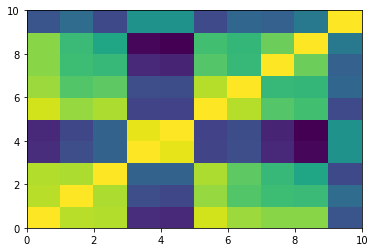

In [27]:
#visualize correlations using heatmap plot.pcolor(corMat)
#Standardization
x=df.iloc[:,20:30]
scaler=preprocessing.StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler_df=pd.DataFrame(x_scaler)
corMat=pd.DataFrame(x_scaler_df.corr())
plot.pcolor(corMat)
plot.show()

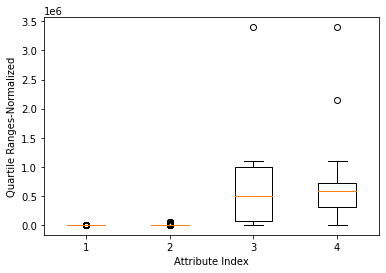

In [46]:
#box plot
summary=df.describe()
dfNormalized=df.iloc[:,[20,21,23,24]]
l = [4,5,7,8]
for i in l:
    mean=summary.iloc[1,i]
    sd=summary.iloc[2,i]
    dfNormalized.iloc[:,i:(i+1)]=(dfNormalized.iloc[:,i:(i+1)]-mean)/sd
array=dfNormalized.values
plot.boxplot(array)
plot.xlabel("Attribute Index")
plot.ylabel(("Quartile Ranges-Normalized"))
plot.show()

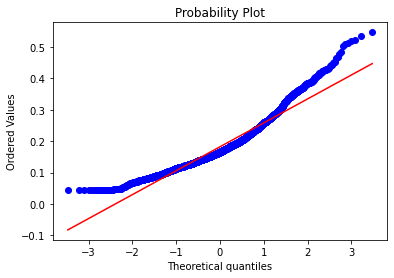

In [43]:
#QQ Plot
stats.probplot(df['LIQ SCORE'],dist='norm',plot=pylab)
pylab.show()

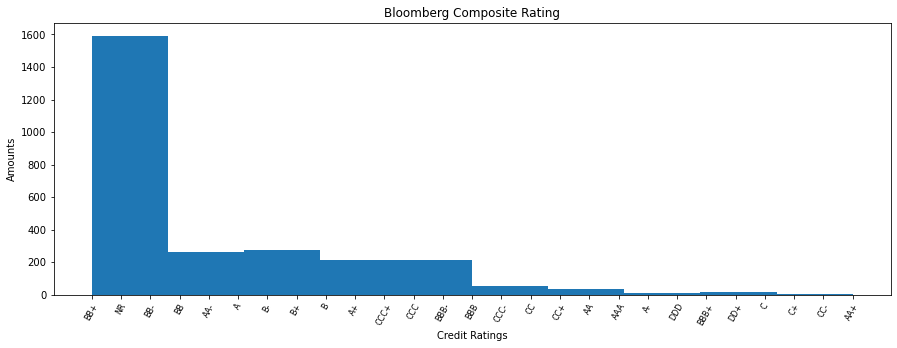

In [44]:
#Histogram
bloomberg=df['Bloomberg Composite Rating'][-df['Bloomberg Composite Rating'].isin(['Nan'])]
plot.figure(figsize=(15,5))
plot.xlabel('Credit Ratings')
plot.ylabel('Amounts')
plot.title('Bloomberg Composite Rating')
plot.xticks(fontsize=8,rotation=60)
_=plot.hist(bloomberg)

In [45]:
print("My name is Xin Zhang")
print("My NetID is: xzhan81")
print("I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.")

My name is Xin Zhang
My NetID is: xzhan81
I hereby certify that I have read the University policy on Academic Integrity and that I am not in violation.
